In [79]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import h5netcdf
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.colors as mcolors

In [80]:
path = r"C:\Users\jaybr\OneDrive\Desktop\RESEARCH\IPSL-CM6A-LR_complete_KTC_G6sulfur_dataset_2085-2099.nc"
KTC = xr.open_dataset(path)

Novel = KTC

In [81]:
BWh = KTC['BWh'].values
BWk = KTC['BWk'].values
BSh = KTC['BSh'].values
BSk = KTC['BSk'].values
xAr = Novel['xAr'].values
xAw = Novel['xAw'].values
Ar = KTC['Ar'].values
Aw = KTC['Aw'].values
Cf = KTC['Cf'].values
Cm = KTC['Cm'].values
DC = KTC['DC'].values
DO = KTC['DO'].values
E = KTC['E'].values
Ft = KTC['Ft'].values
Fi = KTC['Fi'].values

In [82]:
climate_datasets = {
    "BWh": {"dataset": BWh, "variable": "BWh"},  
    "BWk": {"dataset": BWk, "variable": "BWk"},
    "BSh": {"dataset": BSh, "variable": "BSh"},
    "BSk": {"dataset": BSk, "variable": "BSk"},
    "xAr": {"dataset": xAr, "variable": "xAr"},
    "xAw": {"dataset": xAw, "variable": "xAw"},
    "Ar": {"dataset": Ar, "variable": "Ar"},
    "Aw": {"dataset": Aw, "variable": "Aw"},
    "Cf": {"dataset": Cf, "variable": "Cf"},
    "Cm": {"dataset": Cm, "variable": "Cm"},
    "DC": {"dataset": DC, "variable": "DC"},
    "DO": {"dataset": DO, "variable": "DO"},
    "E": {"dataset": E, "variable": "E"},
    "Ft": {"dataset": Ft, "variable": "Ft"},
    "Fi": {"dataset": Fi, "variable": "Fi"},
}

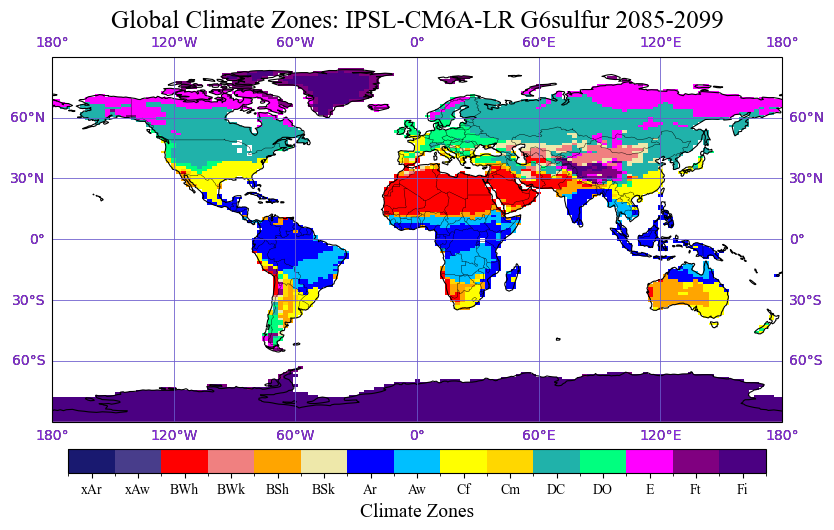

In [83]:
zone_ids = {"xAr": 1, "xAw" : 2, "BWh": 3, "BWk": 4, "BSh": 5, "BSk": 6, "Ar": 7, "Aw": 8, "Cf": 9, "Cm": 10,
            "DC": 11, "DO": 12, "E": 13, "Ft": 14, "Fi": 15}

zone_colors = {"xAr": "midnightblue", "xAw": "darkslateblue", "BWh": "red", "BWk": "lightcoral", "BSh": "orange", "BSk": "palegoldenrod", 
               "Ar": "blue", "Aw": "deepskyblue", "Cm": "gold", "Cf": "yellow", "DO": "springgreen", 
               "DC": "lightseagreen", "E": "magenta", "Ft": "purple", "Fi": "indigo"}

lat_array = np.array(KTC["lat"])  # Convert list to NumPy array
lon_array = np.array(KTC["lon"])

combined_grid = np.full_like(lat_array[:, None] * lon_array[None, :], np.nan, dtype=float)

# Assign novel zones first so they take precedence
for zone in ["xAr", "xAw"]:
    data = Novel[zone].values
    mask = ~np.isnan(data) & (data > 0)  
    combined_grid = np.where(mask, zone_ids[zone], combined_grid)

# Now fill in the remaining climate zones
for zone, info in climate_datasets.items():
    if zone in ["xAr", "xAw"]:  # Skip since already assigned
        continue
    ds = info["dataset"]
    variable = info["variable"]
    data = ds
    mask = ~np.isnan(data) & (data > 0)  
    combined_grid = np.where(mask & np.isnan(combined_grid), zone_ids[zone], combined_grid)

# Creating custom colormap from color designations above
cmap = mcolors.ListedColormap([zone_colors[zone] for zone in zone_ids.keys()])
bounds = [0.5 + i for i in range(len(zone_ids) + 1)]
norm = mcolors.BoundaryNorm(bounds, cmap.N)

fig, ax = plt.subplots(figsize=(12, 6), subplot_kw={"projection": ccrs.PlateCarree()})
ax.set_title("Global Climate Zones: IPSL-CM6A-LR G6sulfur 2085-2099", fontsize=18, fontname='Times New Roman')
lon, lat = np.meshgrid(KTC["lon"].values, KTC["lat"].values)
pcolormesh = ax.pcolormesh(lon, lat, combined_grid, cmap=cmap, norm=norm, transform=ccrs.PlateCarree())

# Adding a legend/key :)
handles = [
    plt.Line2D([0], [0], marker="o", color=color, linestyle="", label=zone)
    for zone, color in zone_colors.items()
]

cbar = fig.colorbar(pcolormesh, ax=ax, orientation="horizontal", pad=0.06, shrink=0.75, aspect=30, ticks=list(zone_ids.values()))
cbar.set_label("Climate Zones", fontsize=14, fontname='Times New Roman')
cbar.set_ticks(list(zone_ids.values()))
cbar.set_ticklabels(list(zone_ids.keys()), fontname='Times New Roman')


ax.coastlines(linewidth=0.8)
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color='slateblue', linewidth=0.4)
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color='slateblue', linewidth=0.4)

# Lat and lon labels 
gl.xlabel_style = {"size": 10, "color": "blueviolet"}  # lon labels
gl.ylabel_style = {"size": 10, "color": "blueviolet"}  # lat labels

ax.add_feature(cfeature.BORDERS, edgecolor="black", linewidth=0.3)

plt.savefig('/Users/jaybr/OneDrive/Desktop/RESEARCH/IPSL-CM6A-LR_KTC_complete_G6sulfur_2085-99.png', dpi=300, bbox_inches='tight') 
plt.show()
